<a href="https://colab.research.google.com/github/bahulaa/PSDV/blob/main/J013_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the datasets
data = pd.read_csv("/content/Data.csv")
state_data = pd.read_csv("/content/State_data.csv")
funding_data = pd.read_csv("/content/NCAP_Funding.csv")


**SPATIAL AGGREGATIONS**

Question 1

In [ ]:
import pandas as pd

# Group by state and calculate the average PM2.5 concentration
state_groupby = data.groupby('state')['PM2.5'].mean()

# Find the state with the highest average PM2.5
highest_pm25_state = state_groupby.idxmax()  # State with max PM2.5
highest_pm25_value = state_groupby.max()  # Highest PM2.5 value

# Print result
print(f"The state with the highest average PM2.5 concentration is {highest_pm25_state} with an average value of {highest_pm25_value:.2f} µg/m³.")


The state with the highest average PM2.5 concentration is Delhi with an average value of 104.10 µg/m³.


Question 2

In [ ]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data_2023 = data[data["Timestamp"].dt.year == 2023]

hazardous_days = data_2023[data_2023["PM2.5"] > 300].groupby("state")["Timestamp"].nunique()

if hazardous_days.empty:
    print("No state recorded hazardous PM2.5 levels in 2023.")
else:
    most_hazardous_state = hazardous_days.idxmax()
    most_hazardous_days = hazardous_days.max()
    print(f"Most hazardous state in 2023: {most_hazardous_state} ({most_hazardous_days} days)")

Most hazardous state in 2023: Delhi (49 days)


Question 3


In [ ]:
state_variability = data_2023.groupby("state")["PM2.5"].std()

if state_variability.empty:
    print("No PM2.5 data available for 2023.")
else:
    most_variable_state = state_variability.idxmax()
    highest_variability = state_variability.max()
    print(f"Highest PM2.5 variability: {most_variable_state} (Std Dev: {highest_variability:.2f})")

Highest PM2.5 variability: Delhi (Std Dev: 82.80)


Question 4

In [ ]:
import pandas as pd

data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data = data.dropna(subset=['Timestamp'])

data_filtered = data[(data['Timestamp'].dt.year >= 2020) & (data['Timestamp'].dt.year <= 2021)]
data_filtered = data_filtered.dropna(subset=['PM2.5'])
data_filtered['PM2.5'] = pd.to_numeric(data_filtered['PM2.5'], errors='coerce')
state_pm25_avg = data_filtered.groupby('state')['PM2.5'].mean()

lowest_pm25_state = state_pm25_avg.idxmin()
lowest_pm25_value = state_pm25_avg.min()

print(f"The state with the lowest average PM2.5 levels (2020-2021) is {lowest_pm25_state} with an average of {lowest_pm25_value:.2f}.")


The state with the lowest average PM2.5 levels (2020-2021) is Mizoram with an average of 14.32.


**TEMPORAL AGGREGATION**

Question 1

In [ ]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")
aug_2020 = data[(data["Timestamp"].dt.year == 2020) & (data["Timestamp"].dt.month == 8)]

max_pm25_row = aug_2020.loc[aug_2020["PM2.5"].idxmax(), ["station", "PM2.5"]] if not aug_2020.empty else None

print(f"Station with highest PM2.5 in Aug 2020: {max_pm25_row['station']} ({max_pm25_row['PM2.5']} µg/m³)" if max_pm25_row is not None else "No data available for August 2020.")

Station with highest PM2.5 in Aug 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB (805.51 µg/m³)


Question 2

In [ ]:
import pandas as pd

data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data_2018 = data[(data['Timestamp'].dt.year == 2018) &
                 (data['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]

data_2018 = data_2018.dropna(subset=['PM2.5'])

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "Other"

# Assign seasons to data
data_2018['Season'] = data_2018['Timestamp'].dt.month.apply(get_season)

# Group by season and calculate average PM2.5
seasonal_avg_pm25 = data_2018.groupby('Season')['PM2.5'].mean()

# Find the season with the highest pollution
highest_pollution_season = seasonal_avg_pm25.idxmax()
highest_pollution_value = seasonal_avg_pm25.max()

# Print results
print("Average PM2.5 concentration for each season in 2018:")
print(seasonal_avg_pm25)
print(f"\nThe season with the highest pollution is {highest_pollution_season} with an average PM2.5 value of {highest_pollution_value:.2f} µg/m³.")


Average PM2.5 concentration for each season in 2018:
Season
Monsoon    34.425196
Other      56.825144
Winter     67.492344
Name: PM2.5, dtype: float64

The season with the highest pollution is Winter with an average PM2.5 value of 67.49 µg/m³.


Question 3

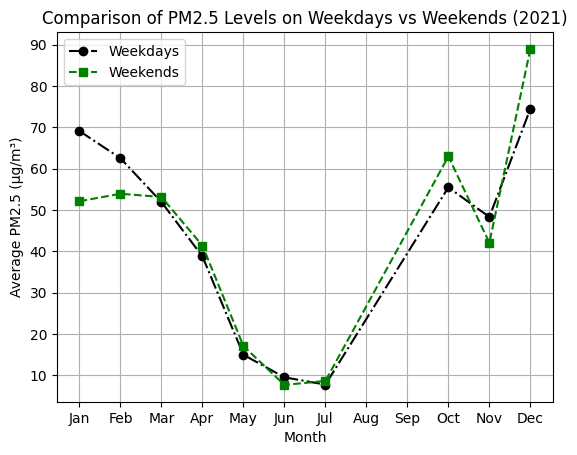

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Timestamp column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# Filter data for the year 2021 and the specific station
data_2021 = data[(data['Timestamp'].dt.year == 2021) &
                 (data['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]

# Drop NaN values in PM2.5
data_2021 = data_2021.dropna(subset=['PM2.5'])

# Extract relevant time details
data_2021['Month'] = data_2021['Timestamp'].dt.month
data_2021['Day_of_Week'] = data_2021['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6

# Categorize as Weekday (0-4) or Weekend (5-6)
data_2021['Weekend'] = data_2021['Day_of_Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by Month and Weekend/Weekday, then compute the mean PM2.5
monthly_avg_pm25 = data_2021.groupby(['Month', 'Weekend'])['PM2.5'].mean().unstack()

# Plot the results
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25['Weekday'], marker='o', linestyle='-.', label='Weekdays', color='black')
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25['Weekend'], marker='s', linestyle='--', label='Weekends', color='green')

# Labels and title
plt.xlabel("Month")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("Comparison of PM2.5 Levels on Weekdays vs Weekends (2021)")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)

# Show plot
plt.show()


**Spatio-temporal aggregation**

Question 1

In [ ]:
import numpy as np
import pandas as pd

data=pd.read_csv('/content/Data.csv')
Ncap_Funding =pd.read_csv("/content/NCAP_Funding.csv")
state_data=pd.read_csv("/content/State_data.csv")

data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data_2021 = data[data['Timestamp'].dt.year == 2021]
data_2021['month']=data_2021['Timestamp'].dt.month
data_2021['season']=data_2021['month'].apply(lambda x: 'summer' if x in [3,4,5]
                                             else 'monsoon' if x in [6,7,8,9]
                                             else 'winter')

data_2021_season = data_2021.groupby(['state', 'season'])['PM2.5'].mean().unstack()

data_2021_season = data_2021_season.dropna()

data_2021_season['percentage_change'] = ((data_2021_season['monsoon']-data_2021_season['summer'])/data_2021_season['summer'])*100
data_2021_season_sorted=data_2021_season['percentage_change'].abs().sort_values(ascending=False)

print('percentage changes: \n', data_2021_season_sorted)

print('\n state has the most difference is: \n', data_2021_season_sorted.iloc[:1])

percentage changes: 
 state
Mizoram              89.823365
Meghalaya            78.170881
Tripura              73.232538
Nagaland             70.599020
Assam                70.551996
Telangana            63.287281
Arunachal Pradesh    61.279983
Bihar                60.972202
Uttar Pradesh        60.281457
Maharashtra          54.693519
West Bengal          52.693321
Madhya Pradesh       52.398121
Odisha               51.671893
Karnataka            51.077553
Delhi                47.248344
Andhra Pradesh       42.407749
Rajasthan            40.277218
Haryana              36.458575
Kerala               32.310272
Punjab               30.728571
Gujarat              30.202385
Puducherry           26.434615
Tamil Nadu           17.763788
Chandigarh            9.806568
Jammu and Kashmir     8.367622
Name: percentage_change, dtype: float64

 state has the most difference is: 
 state
Mizoram    89.823365
Name: percentage_change, dtype: float64


<ipython-input-20-b02973dde5b8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['month']=data_2021['Timestamp'].dt.month
<ipython-input-20-b02973dde5b8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['season']=data_2021['month'].apply(lambda x: 'summer' if x in [3,4,5]


Question 2

<ipython-input-21-f41652c4de93>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year['year']=data_year['Timestamp'].dt.year
<ipython-input-21-f41652c4de93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year['month']=data_year['Timestamp'].dt.month
<ipython-input-21-f41652c4de93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

season    monsoon     summer      winter
year                                    
2017    52.058519  98.525562  168.601736
2018    51.366940  92.307981  189.692843
2019    46.200330  84.982546  179.034521
2020    38.362705  53.583184  158.383736
2021    41.243770  78.184788  182.867699


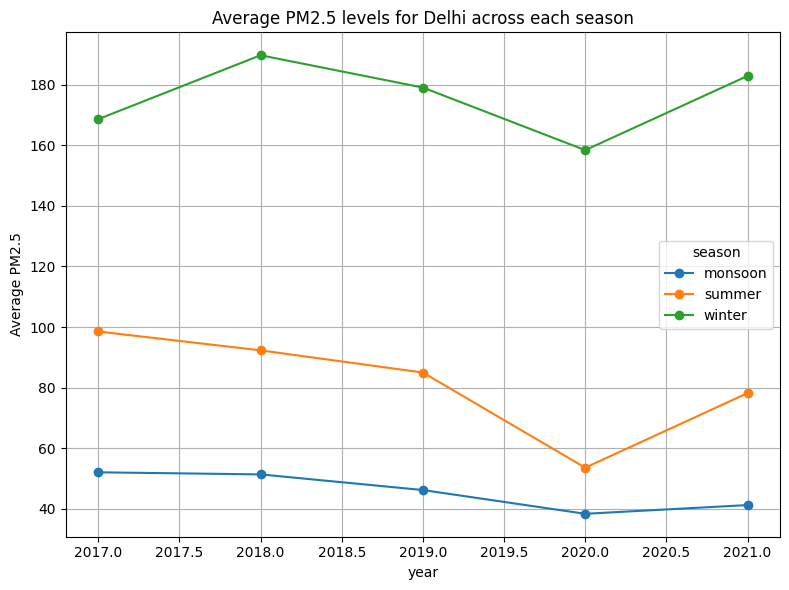

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('/content/Data.csv')
state_data=pd.read_csv("/content/State_data.csv")


data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data_year=data[data['Timestamp'].dt.year.isin([2017,2018,2019,2020,2021])]
data_year['year']=data_year['Timestamp'].dt.year
data_year['month']=data_year['Timestamp'].dt.month
data_year['season']=data_year['month'].apply(lambda x: 'summer' if x in [3,4,5]
                                             else 'monsoon' if x in [6,7,8,9]
                                             else 'winter' if x in [12,1,2]
                                             else None)
data_year_grouped= data_year.groupby(['year','season','city'])['PM2.5'].mean()


data_delhi = data_year_grouped.xs('Delhi', level='city').unstack()
data_delhi=data_delhi.dropna()
# .xs is used to to seperate the column delhi
#ie, it is used in the place of .loc[:,'Delhi']
#unstack is used to structure the data in the effective manner
data_delhi.index.name = 'year'
# Plot grouped bar chart
print(data_delhi)
data_delhi.plot(figsize=(8, 6),marker='o')
plt.xlabel("year")
plt.ylabel("Average PM2.5")
plt.title("Average PM2.5 levels for Delhi across each season")
plt.xticks(rotation=0)
plt.grid()

plt.tight_layout()
plt.show()

Question 3


<ipython-input-3-95d6a2e81f17>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year['year']=data_year['Timestamp'].dt.year


city       Delhi     Mumbai
year                       
2017  130.857720  43.246625
2018  113.206232  35.005524
2019  108.578564  34.911579
2020   95.639458  42.301223
2021  105.401629  47.642947


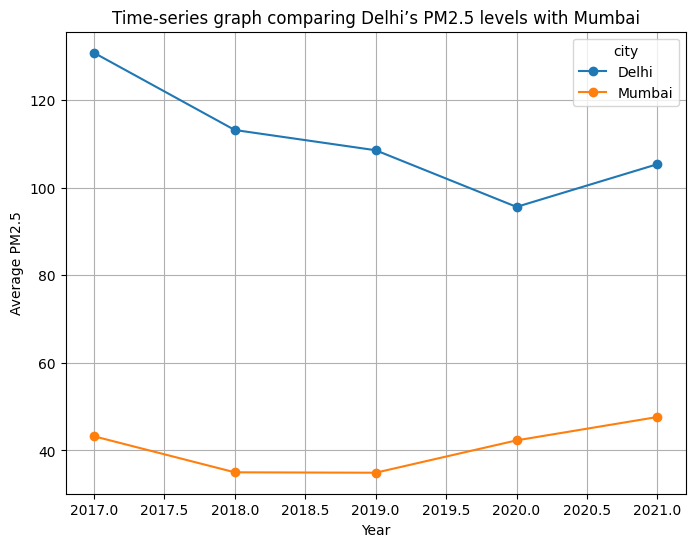


 City had more fluctuations is :
  Delhi


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("/content/Data.csv")

data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data_year=data[data['Timestamp'].dt.year.isin([2017,2018,2019,2020,2021])]
data_year['year']=data_year['Timestamp'].dt.year
data_state_group=data_year.groupby(['year', 'city'])['PM2.5'].mean()
data_delhi_mumbai=data_state_group.loc[:,['Delhi','Mumbai']]
data_unstack=data_delhi_mumbai.unstack()
print(data_unstack)

data_unstack.plot(figsize=(8,6),rot=0,marker='o')
plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.title("Time-series graph comparing Delhi’s PM2.5 levels with Mumbai")
plt.grid()
plt.show()

#Fluctuations: we should compare by standard deviation
fluctuations=data_unstack.std()
max_fluct=fluctuations.idxmax() # gives index but here in place of index there is names of cities
print("\n City had more fluctuations is :\n ",max_fluct)


**POPULATION-BASED**

Question 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/content/Data.csv')
state_data=pd.read_csv("/content/State_data.csv")
data_station=data.groupby('state')['station'].nunique()
state_merge=pd.merge(state_data,data_station,left_on='State',right_on='state')
state_merge['population_stations']=state_merge['station']/state_merge['Population']

max_index=state_merge['population_stations'].idxmax()
max_state=state_merge.loc[max_index,'State']

print(max_state)

Chandigarh


Question 2

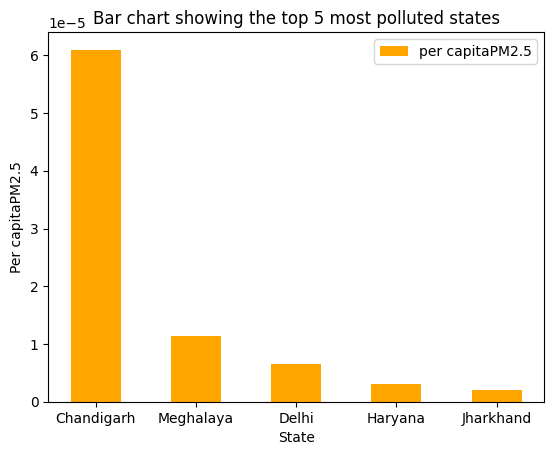

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/content/Data.csv')
state_data=pd.read_csv("/content/State_data.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data_year = data[data['Timestamp'].dt.year == 2019]
data_state= data_year.groupby('state')['PM2.5'].mean()
state_merge=pd.merge(state_data,data_state,left_on='State',right_on='state')
state_merge['per_capita']=state_merge['PM2.5']/state_merge['Population']
state_merge = state_merge.dropna()
data_sorted=state_merge.sort_values(by='per_capita',ascending=False)
data_top5=data_sorted.head(5)

x=data_top5['State']
y=data_top5['per_capita']
plt.bar(x,y,color='orange',width=0.5,label='per capitaPM2.5')
plt.xlabel("State")
plt.ylabel("Per capitaPM2.5")
plt.title("Bar chart showing the top 5 most polluted states")
plt.legend()
plt.show()

Question 3

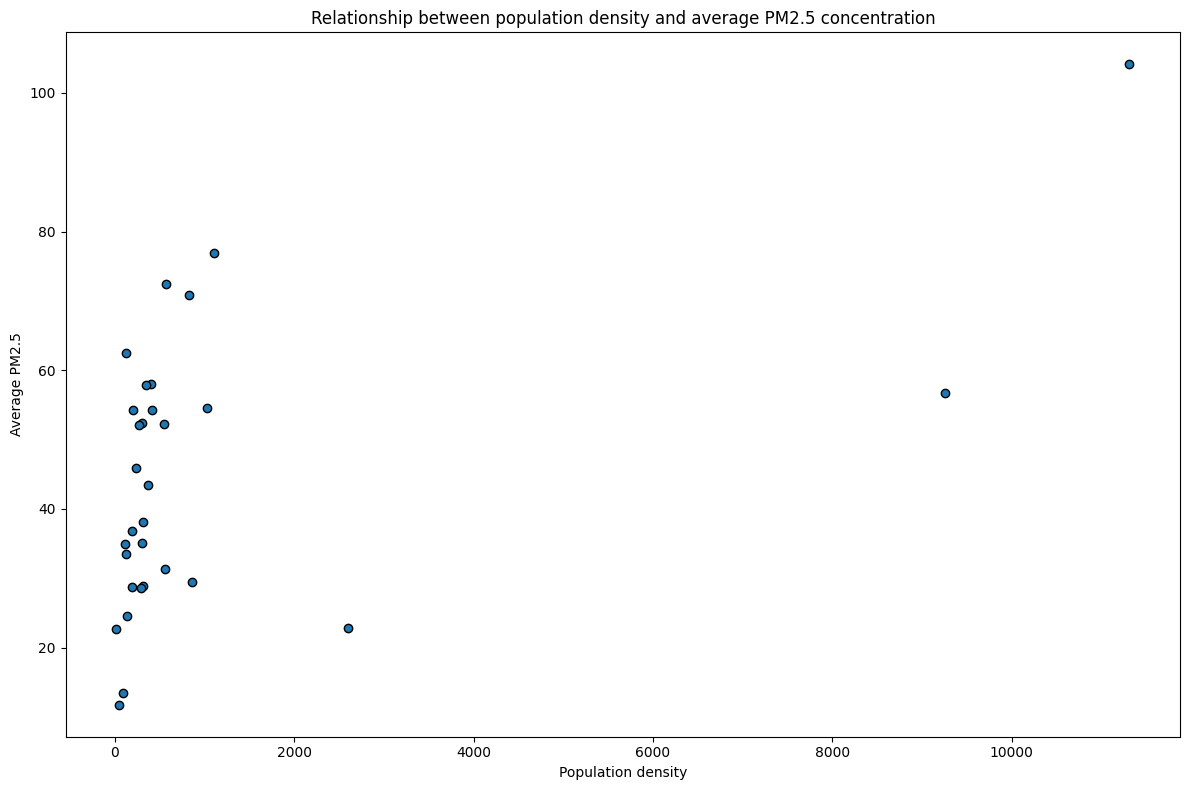

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/content/Data.csv')
data_state=pd.read_csv("/content/State_data.csv")
data_state_group= data.groupby('state')['PM2.5'].mean()
merged_data=pd.merge(data_state,data_state_group,left_on='State',right_on='state',how='left')
merged_data=merged_data.dropna()
merged_data['Population_density']=merged_data['Population']/merged_data['Area (km2)']

x=merged_data['Population_density']
y=merged_data['PM2.5']
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(x,y,edgecolor='black')
ax.set_xlabel("Population density")
ax.set_ylabel("Average PM2.5")
ax.set_title("Relationship between population density and average PM2.5 concentration")
plt.tight_layout()
plt.show()


**AREA BASED**


Question 1


state with highest PM2.5 concentration per square kilometer:  Chandigarh


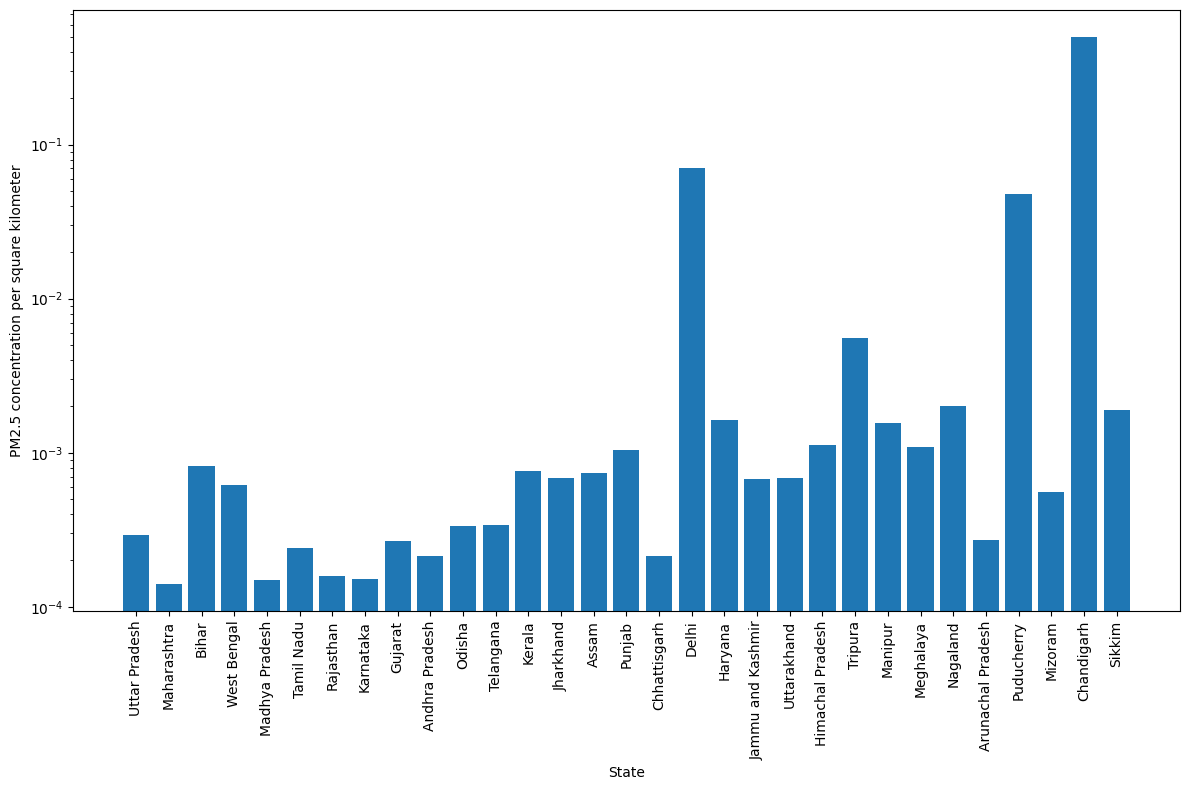

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/content/Data.csv')
state_data=pd.read_csv("/content/State_data.csv")

data_state_group= data.groupby('state')['PM2.5'].mean()
state_merge=pd.merge(state_data,data_state_group,left_on='State',right_on='state',how='left')
state_merge=state_merge.dropna()
state_merge['conc_per_area']=state_merge['PM2.5']/state_merge['Area (km2)']
index=state_merge['conc_per_area'].idxmax()
state_max=state_merge.loc[index,'State']
print("state with highest PM2.5 concentration per square kilometer: ",state_max)
y=state_merge['conc_per_area']
x=state_merge['State']
fig,ax=plt.subplots(figsize=(12,8))
ax.bar(x,y)
ax.set_yscale('log') # logarithemic scale is used for better visualisation
ax.set_xlabel("State")
ax.set_ylabel("PM2.5 concentration per square kilometer")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Question 2


state with the highest density of monitoring stations relative to its area:  Delhi


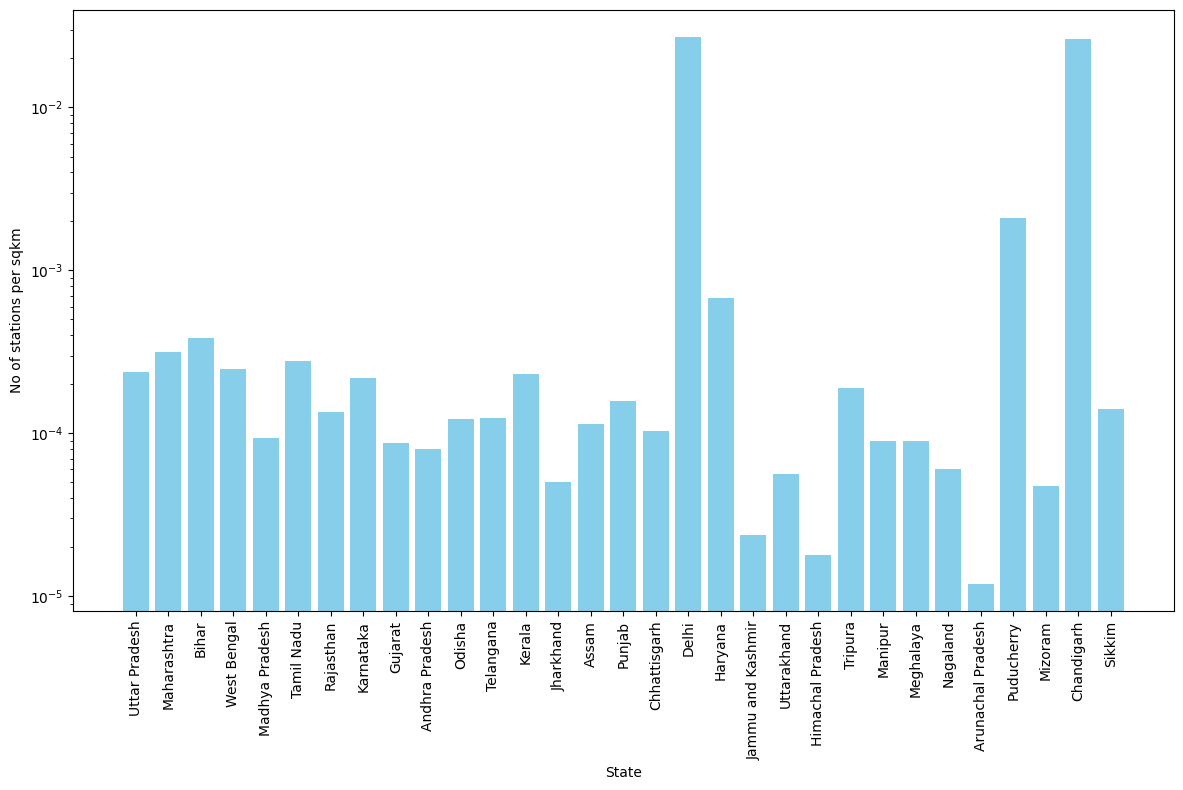

In [ ]:
#Counts the number of unique (distinct) station names in each state.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/content/Data.csv')
state_data=pd.read_csv("/content/State_data.csv")

data_count=data.groupby('state')['station'].nunique()
state=pd.merge(state_data,data_count,left_on='State',right_on='state',how='left')
state=state.dropna()
state['density_station'] = state['station']/state['Area (km2)']
index=state['density_station'].idxmax()
max_state=state.loc[index,'State']
print("state with the highest density of monitoring stations relative to its area: ",max_state)

x=state['State']
y=state['density_station']
fig,ax=plt.subplots(figsize=(12,8))
ax.bar(x,y,color='skyblue')
ax.set_xlabel("State")
ax.set_ylabel('No of stations per sqkm')
plt.xticks(rotation=90)
plt.tight_layout()
ax.set_yscale('log')
plt.show()

Question 3

In [ ]:
df2 = pd.read_csv('/content/Data.csv', on_bad_lines='skip', engine='python')
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'], format='mixed', errors='coerce')
df2_2021 = df2[df2["Timestamp"].dt.year == 2021]
df2_2021['PM2.5'] = pd.to_numeric(df2_2021['PM2.5'], errors='coerce')
a = df2_2021.groupby('state')['PM2.5'].mean()
df3 = pd.read_csv('/content/State_data.csv', on_bad_lines='skip', engine='python')
df3.rename(columns={'State': 'state'}, inplace=True)
result2 = pd.merge(a, df3, on='state',how='outer')
result2["population_density"] = result2["Population"] / result2["Area (km2)"]
filtered_result2 = result2[result2["state"].isin(["Madhya Pradesh", "Maharashtra"])]
print(filtered_result2)


             state      PM2.5  Population  Area (km2)  population_density
14  Madhya Pradesh  47.095952    72626809      308252          235.608557
15     Maharashtra  46.440044   112374333      307713          365.192023


<ipython-input-10-bff7d4340b94>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_2021['PM2.5'] = pd.to_numeric(df2_2021['PM2.5'], errors='coerce')


**FUNDING BASED**

Question 1

Average PM2.5 in states that received NCAP funding in 2021: 55.82
Average PM.5 in states that did NOT receive NCAP funding in 2021: 63.21


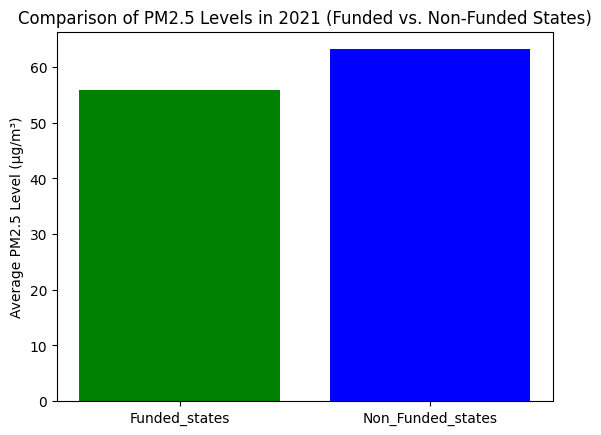

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

state_data = pd.read_csv('/content/Data.csv')  # PM2.5 data
ncap_funding = pd.read_csv("/content/NCAP_Funding.csv")  # Funding data

state_data['Timestamp']=pd.to_datetime(state_data['Timestamp'], errors='coerce')
state_data['Year']=state_data['Timestamp'].dt.year
state_data_2021 = state_data[state_data["Year"] == 2021]
ncap_funding_2021 = ncap_funding[["State", "Amount released during FY 2020-21"]]
merged_data = state_data_2021.merge(ncap_funding_2021, left_on="state", right_on='State',how="left")
# Convert the funding column to numeric, forcing errors='coerce' to handle non-numeric values
merged_data["Amount released during FY 2020-21"] = pd.to_numeric(merged_data["Amount released during FY 2020-21"], errors='coerce')
merged_data["Received_Funding"] = merged_data["Amount released during FY 2020-21"].notna() & (merged_data["Amount released during FY 2020-21"] > 0)
#It will assign True to all states that exist in the funding dataset, even if they received ₹0 funding.
#But we only want to count states that got actual money (funding > 0), so this is not enough.

pm25_funded = merged_data[merged_data["Received_Funding"] == True]["PM2.5"].mean()
pm25_non_funded = merged_data[merged_data["Received_Funding"] == False]["PM2.5"].mean()
print(f"Average PM2.5 in states that received NCAP funding in 2021: {pm25_funded:.2f}")
print(f"Average PM.5 in states that did NOT receive NCAP funding in 2021: {pm25_non_funded:.2f}")
categories=['Funded_states','Non_Funded_states']
values=[pm25_funded,pm25_non_funded]

plt.bar(categories,values, color=['green', 'blue'])
plt.ylabel("Average PM2.5 Level (µg/m³)")
plt.title("Comparison of PM2.5 Levels in 2021 (Funded vs. Non-Funded States)")
plt.show()

Question 3


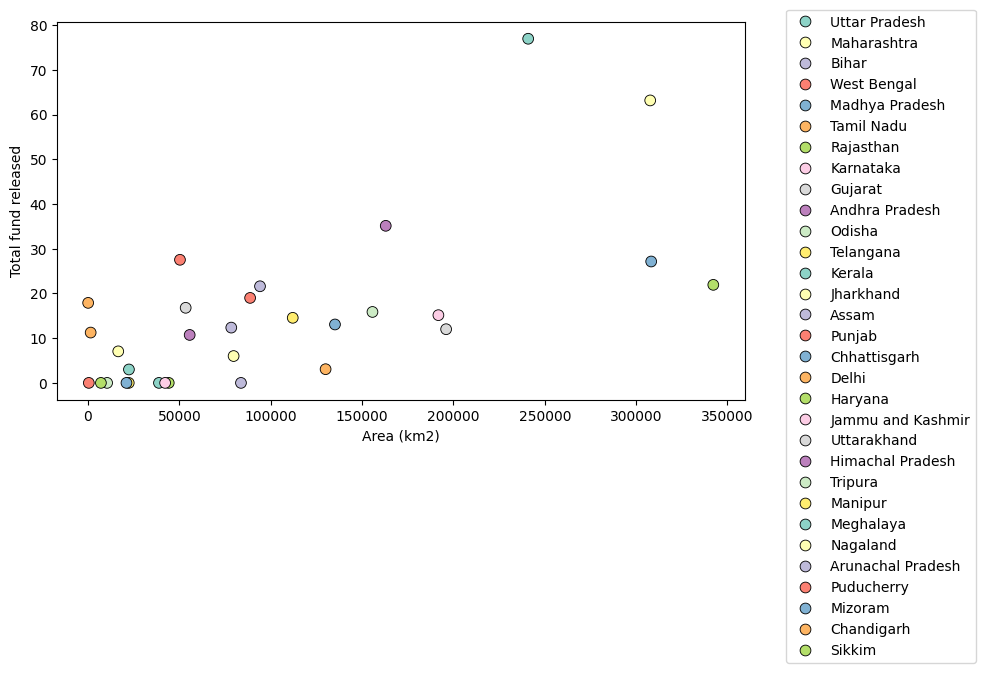

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

NCAP_Funding=pd.read_csv("/content/NCAP_Funding.csv")
state__data=pd.read_csv("/content/State_data.csv")
NCAP_group=NCAP_Funding.groupby('State')['Total fund released'].sum()
state_funding=pd.merge(state__data,NCAP_group,on='State',how='left')
state_funding.fillna(0,inplace=True)
plt.figure(figsize=(10,6))
sns.scatterplot(data=state_funding,x='Area (km2)',y='Total fund released',hue='State',palette='Set3',s=60,edgecolor='black')
plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left')
plt.tight_layout()
plt.show()

Question 2

<ipython-input-15-2bf38a7085eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_air_quality["Timestamp"] = pd.to_datetime(assam_air_quality["Timestamp"])
<ipython-input-15-2bf38a7085eb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_funding[col] = pd.to_numeric(assam_funding[col], errors="coerce")


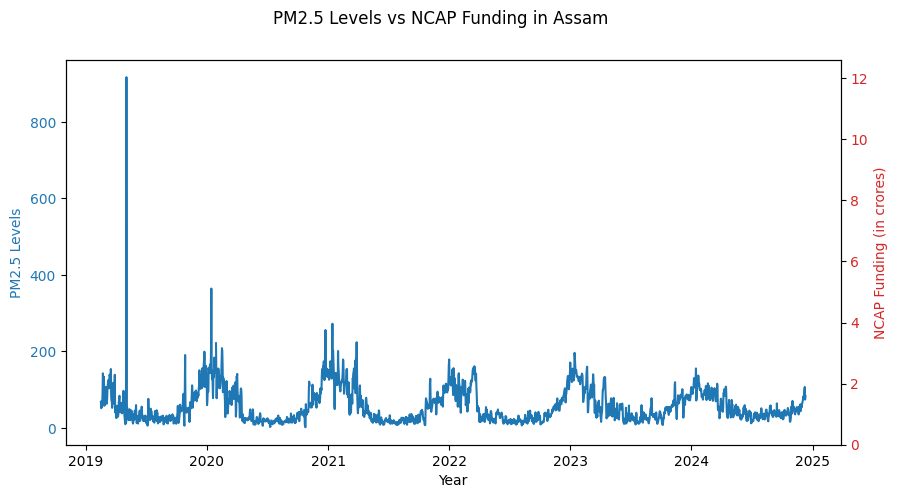

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data_df = pd.read_csv("/content/Data.csv")
ncap_funding_df = pd.read_csv("/content/NCAP_Funding.csv")
assam_air_quality = data_df[data_df["state"] == "Assam"]
assam_air_quality["Timestamp"] = pd.to_datetime(assam_air_quality["Timestamp"])
assam_pm25_trend = assam_air_quality.groupby("Timestamp")["PM2.5"].mean().reset_index()
assam_funding = ncap_funding_df[ncap_funding_df["State"] == "Assam"]
funding_columns = [
    "Amount released during FY 2019-20",
    "Amount released during FY 2020-21",
    "Amount released during FY 2021-22"
]
for col in funding_columns:
    assam_funding[col] = pd.to_numeric(assam_funding[col], errors="coerce")
assam_funding_trend = assam_funding[funding_columns].sum().reset_index()
assam_funding_trend.columns = ["Year", "Funding"]
assam_funding_trend["Year"] = assam_funding_trend["Year"].str.extract(r"(\d{4}-\d{2})")[0]
assam_funding_trend["Year"] = pd.to_datetime(assam_funding_trend["Year"], format="%Y-%y")
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_xlabel("Year")
ax1.set_ylabel("PM2.5 Levels", color="tab:blue")
ax1.plot(assam_pm25_trend["Timestamp"], assam_pm25_trend["PM2.5"], color="tab:blue", label="PM2.5 Levels")
ax1.tick_params(axis='y', labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("NCAP Funding (in crores)", color="tab:red")
ax2.bar(assam_funding_trend["Year"], assam_funding_trend["Funding"], color="tab:red", alpha=0.5, label="NCAP Funding")
ax2.tick_params(axis='y', labelcolor="tab:red")

fig.suptitle("PM2.5 Levels vs NCAP Funding in Assam")
plt.show()

**MISCELLANEOUS QUESTIONS**


Question 1

In [ ]:
import pandas as pd
data_df=pd.read_csv('/content/Data.csv', on_bad_lines='skip')
data_df["Timestamp"]=pd.to_datetime(data_df["Timestamp"])
data_2023=data_df[data_df["Timestamp"].dt.year == 2023]
city_avg_pm25=data_2023.groupby("city")["PM2.5"].mean()
most_polluted_city=city_avg_pm25.idxmax()
print(f"The most polluted city in 2023 was {most_polluted_city}.")
populatedcity_data=data_2023[data_2023["city"] == most_polluted_city]
populatedcity_data["Date"]=populatedcity_data["Timestamp"].dt.date
days_above_limit=populatedcity_data.groupby("Date")["PM2.5"].mean() > 300
percentage_hazardous_days=(days_above_limit.sum() / days_above_limit.count()) * 100
print(f"The most polluted city in 2023 was {most_polluted_city}.")
print(f"Percentage of days with hazardous PM2.5 levels: {percentage_hazardous_days:.2f}%")

The most polluted city in 2023 was Darbhanga.
The most polluted city in 2023 was Darbhanga.
Percentage of days with hazardous PM2.5 levels: 0.82%


<ipython-input-17-832532a2649b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  populatedcity_data["Date"]=populatedcity_data["Timestamp"].dt.date


Question 2

<ipython-input-18-aaef59ca24a8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data["Year"] = delhi_data["Timestamp"].dt.year
<ipython-input-18-aaef59ca24a8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data["Month"] = delhi_data["Timestamp"].dt.month
<ipython-input-18-aaef59ca24a8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

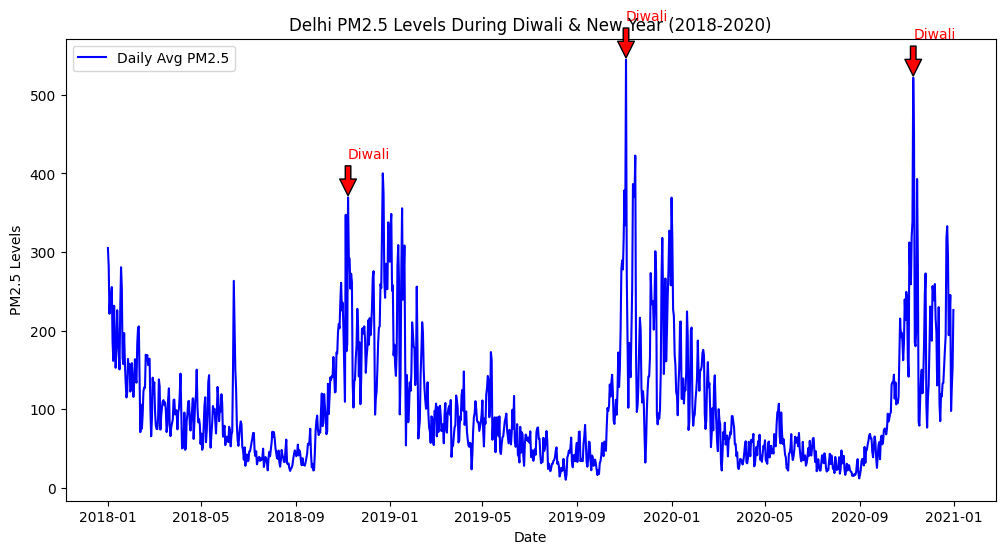

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.read_csv('/content/Data.csv')

# Convert Timestamp to datetime
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors="coerce")

# Filter for Delhi between 2018 and 2020
delhi_data = data_df[(data_df["city"] == "Delhi") & (data_df["Timestamp"].dt.year.isin([2018, 2019, 2020]))]

# Extract month and year
delhi_data["Year"] = delhi_data["Timestamp"].dt.year
delhi_data["Month"] = delhi_data["Timestamp"].dt.month
delhi_data["Date"] = delhi_data["Timestamp"].dt.date

# Group by date and calculate average PM2.5 levels
delhi_daily_pm25 = delhi_data.groupby("Date")["PM2.5"].mean()

# Define festival periods
diwali_months = [10, 11]
new_year_days = ["01-01-2018", "01-01-2019", "01-01-2020"]

# Plot PM2.5 trends
plt.figure(figsize=(12, 6))
plt.plot(delhi_daily_pm25, label="Daily Avg PM2.5", color="blue")

# Mark Diwali spikes
for year in [2018, 2019, 2020]:
    # Filter delhi_daily_pm25 directly using its index
    diwali_data = delhi_daily_pm25[delhi_daily_pm25.index.isin(delhi_data[(delhi_data["Year"] == year) & (delhi_data["Month"].isin(diwali_months))]["Date"])]
    if not diwali_data.empty:
        max_diwali_date = diwali_data.idxmax()
        plt.annotate("Diwali", xy=(max_diwali_date, diwali_data.max()), xytext=(max_diwali_date, diwali_data.max() + 50),
                     arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

# Mark New Year spikes
for new_year in new_year_days:
    new_year_date = pd.to_datetime(new_year)
    if new_year_date in delhi_daily_pm25.index:
        plt.annotate("New Year", xy=(new_year_date, delhi_daily_pm25[new_year_date]),
                     xytext=(new_year_date, delhi_daily_pm25[new_year_date] + 50),
                     arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10, color='green')

plt.xlabel("Date")
plt.ylabel("PM2.5 Levels")
plt.title("Delhi PM2.5 Levels During Diwali & New Year (2018-2020)")
plt.legend()
plt.show()

Question 3

<ipython-input-19-03e4ada4abcc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  funding_data['Amount released during FY 2020-21'].fillna(0,inplace=True)


The highest funded state is Andhra Pradesh
year
2017    46.966870
2018    38.158007
2019    33.899712
2020    30.425130
2021    33.316491
2022    34.334527
2023    36.294259
2024    33.274945
Name: PM2.5, dtype: float64


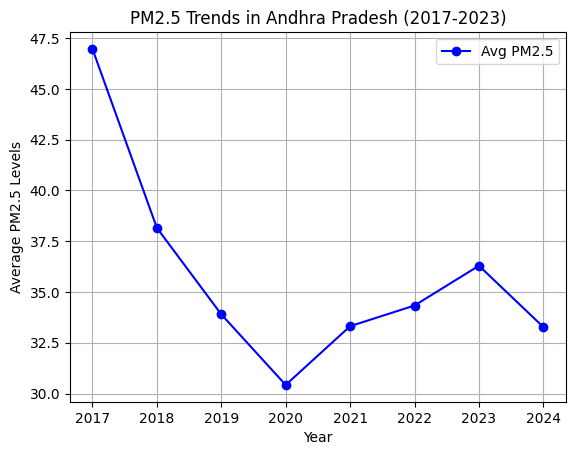

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
state_pollution_data = pd.read_csv('/content/Data.csv')
funding_data = pd.read_csv('/content/NCAP_Funding.csv')
funding_data['Amount released during FY 2020-21']=pd.to_numeric(funding_data["Amount released during FY 2020-21"], errors="coerce")
funding_data['Amount released during FY 2020-21'].fillna(0,inplace=True)
state_funding_data=funding_data.groupby('State')['Amount released during FY 2020-21'].sum()
highest_funded_state=state_funding_data.idxmax()
print(f'The highest funded state is {highest_funded_state}')

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors="coerce")
data_df["year"] = data_df["Timestamp"].dt.year
state_data = data_df[data_df["state"] == highest_funded_state]
filtered_data = data_df[data_df["year"].between(2017,2023)]
yearly_pm25 = state_data.groupby("year")["PM2.5"].mean()
print(yearly_pm25)

plt.plot(yearly_pm25.index, yearly_pm25.values, marker='o', linestyle='-', color='b', label='Avg PM2.5')
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title(f"PM2.5 Trends in {highest_funded_state} (2017-2023)")
plt.legend()
plt.grid(True)

In [ ]:
pip install cartopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 73.1 MB/s eta 0:00:00


Question 4

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


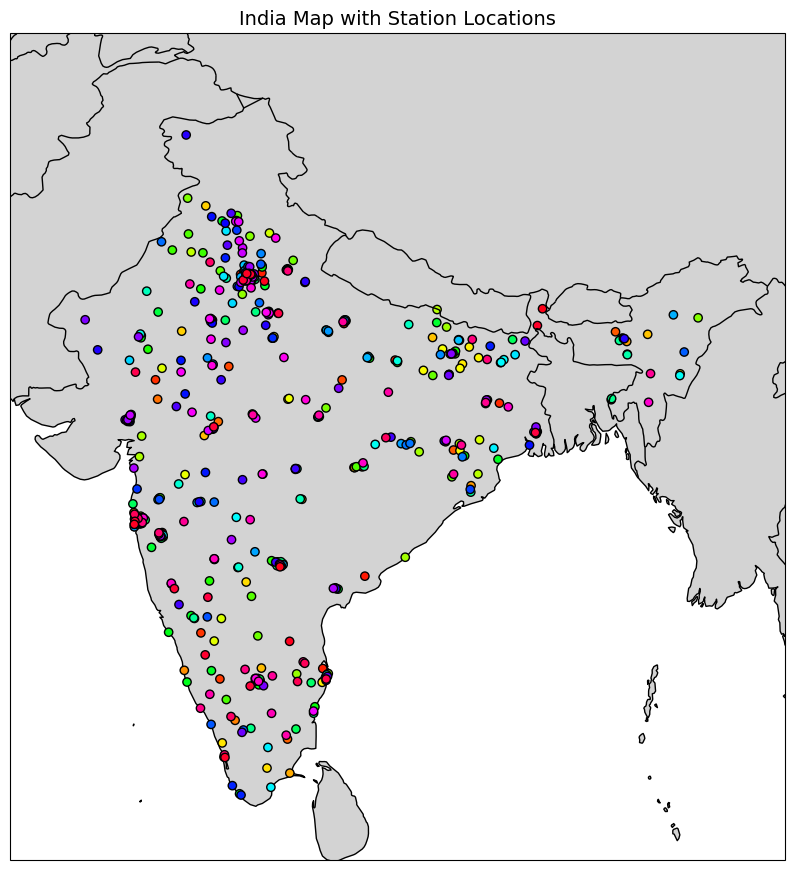

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming 'data' is your DataFrame containing city, latitude, longitude, and station info
# Ensure 'data' is loaded before running this script

# Extract relevant geographical data and remove duplicate stations
geographical_data = data[['city', 'latitude', 'longitude', 'station']].drop_duplicates(subset=['station'])

# Create the figure and axis for the map
fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features (land, borders)
ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")
ax.add_feature(cfeature.BORDERS, edgecolor="black")

# Set map extent to cover India
ax.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())

# Generate a color palette based on the number of stations
num_stations = geographical_data.shape[0]
colors = sns.color_palette("hsv", num_stations)

# Plot station locations with colors
sc = ax.scatter(
    geographical_data['longitude'], geographical_data['latitude'],
    color=colors, marker='o', edgecolor="black", transform=ccrs.PlateCarree()
)

# Title
plt.title("India Map with Station Locations", fontsize=14)

# Show the p
plt.show()


**TELL US SOMETHING NEW**

Question 1


Top 5 Most Polluted Days:
Date
2017-11-08    275.598652
2019-11-03    246.617221
2017-11-09    233.556850
2017-11-12    228.510346
2017-11-07    227.463056
Name: PM2.5, dtype: float64


<ipython-input-50-7535f7b797ef>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=extreme_events.index, y=extreme_events.values, palette='Reds')


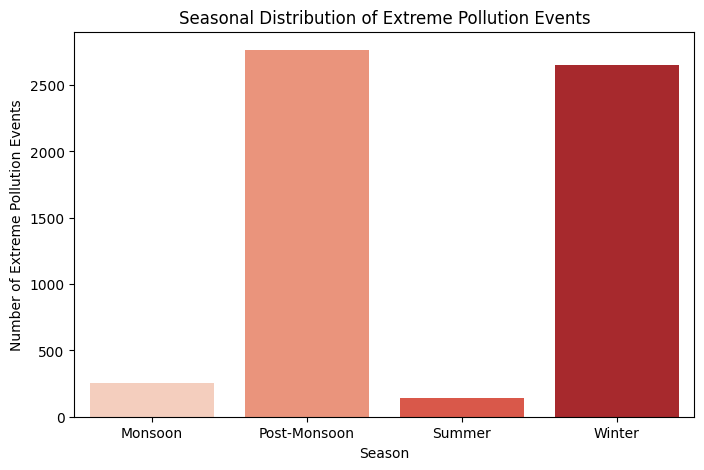

In [50]:
'''Identifying the top 5 most polluted days across all stations and states.
Checking if there are specific months or seasons when extreme pollution events are more frequent.'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "/content/Data.csv"
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors="coerce")
data_df["Date"] = data_df["Timestamp"].dt.date




df = data_df[['Date', 'state', 'city', 'station', 'PM2.5']]


top_5_days = df.groupby('Date')['PM2.5'].mean().nlargest(5)
print("Top 5 Most Polluted Days:")
print(top_5_days)


data_df['Month'] = data_df['Timestamp'].dt.month
data_df['Season'] = data_df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon',
    10: 'Post-Monsoon', 11: 'Post-Monsoon'
})


extreme_events = data_df[df['PM2.5'] > 300].groupby('Season').size()

plt.figure(figsize=(8, 5))
sns.barplot(x=extreme_events.index, y=extreme_events.values, palette='Reds')
plt.xlabel("Season")
plt.ylabel("Number of Extreme Pollution Events")
plt.title("Seasonal Distribution of Extreme Pollution Events")
plt.show()

